In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
df=pd.read_csv("survey_results_public.csv")

In [184]:
df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [185]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [186]:
df=df[["Country", "EdLevel",'Employment', "YearsCodePro","ConvertedCompYearly"]]
df=df.rename({"Country":"Pays", "EdLevel":"Niveau d'étude","Employment":"Type d'emploi", 
              "YearsCodePro":"Année(s) d'expérience","ConvertedCompYearly":"Salaire"}, axis=1)

In [187]:
df.head()

,Pays,Niveau d'étude,Type d'emploi,Année(s) d'expérience,Salaire
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,"Employed, full-time",NaN,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",17,215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",3,NaN


In [188]:
df.isna().sum()

Pays                      1497
Niveau d'étude            1697
Type d'emploi             1559
Année(s) d'expérience    21435
Salaire                  35197
dtype: int64

In [189]:
df=df[df["Salaire"].notnull()]

In [190]:
# Supprimer les valeurs nulles
df.dropna(inplace=True)
df.isna().sum()

Pays                     0
Niveau d'étude           0
Type d'emploi            0
Année(s) d'expérience    0
Salaire                  0
dtype: int64

In [191]:
# Filtrer sur les temps plein
df=df[df["Type d'emploi"]== "Employed, full-time"]
df=df.drop("Type d'emploi", axis=1)

In [192]:
df["Pays"].value_counts()

Pays
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64

In [193]:
def sorten_categories(categories, cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>= cutoff:
            categorical_map[categories.index[i]]= categories.index[i]
        else:
            categorical_map[categories.index[i]]= "Autre"
    return categorical_map

In [194]:
country_map=sorten_categories(df.Pays.value_counts(), 400)
df["Pays"]=df.Pays.map(country_map)
df.Pays.value_counts()

Pays
Autre                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: count, dtype:

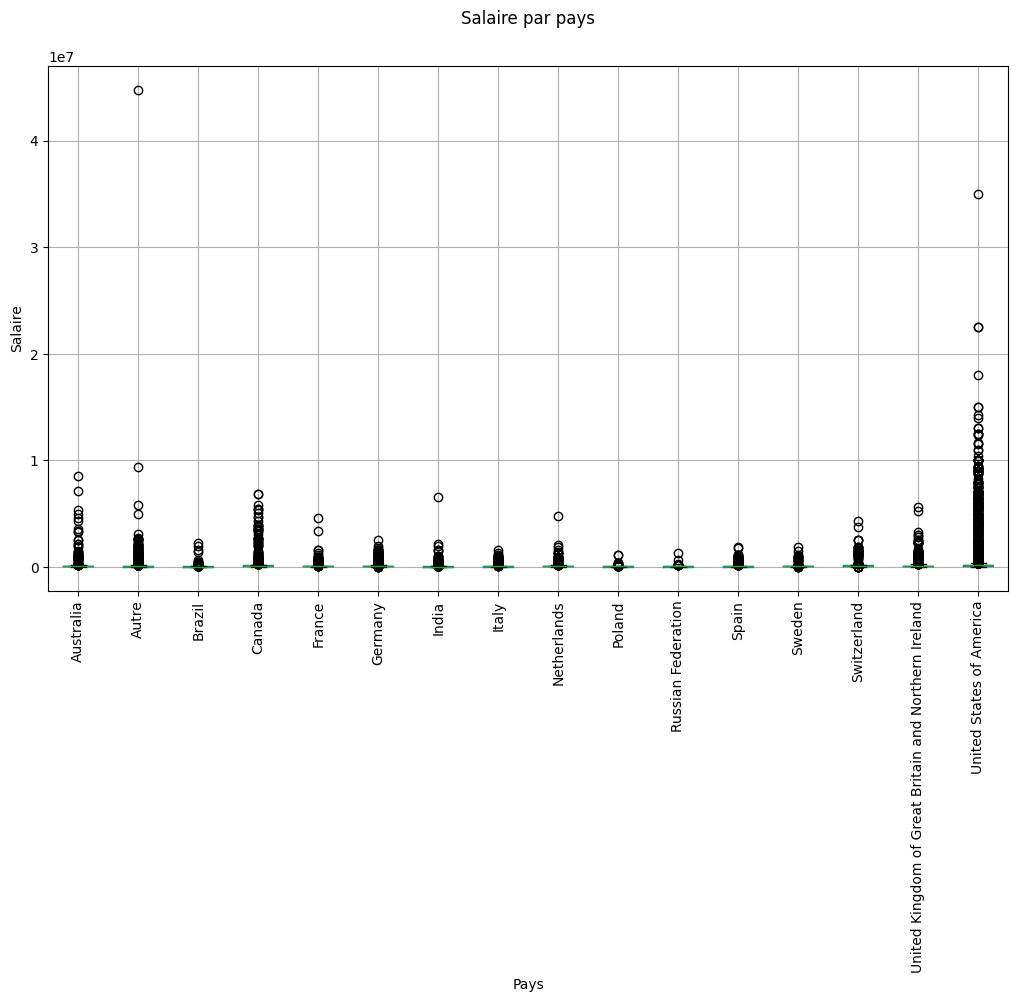

In [195]:
fig, ax =plt.subplots(1,1, figsize=(12,7))
df.boxplot("Salaire", "Pays", ax=ax)
plt.suptitle("Salaire par pays")
plt.title("")
plt.ylabel("Salaire")
plt.xticks(rotation=90)
plt.show()

In [196]:
df=df[(df["Salaire"]>=10000)]
df=df[df["Salaire"]<=250000]
df=df[df["Pays"]!= "Autre"]

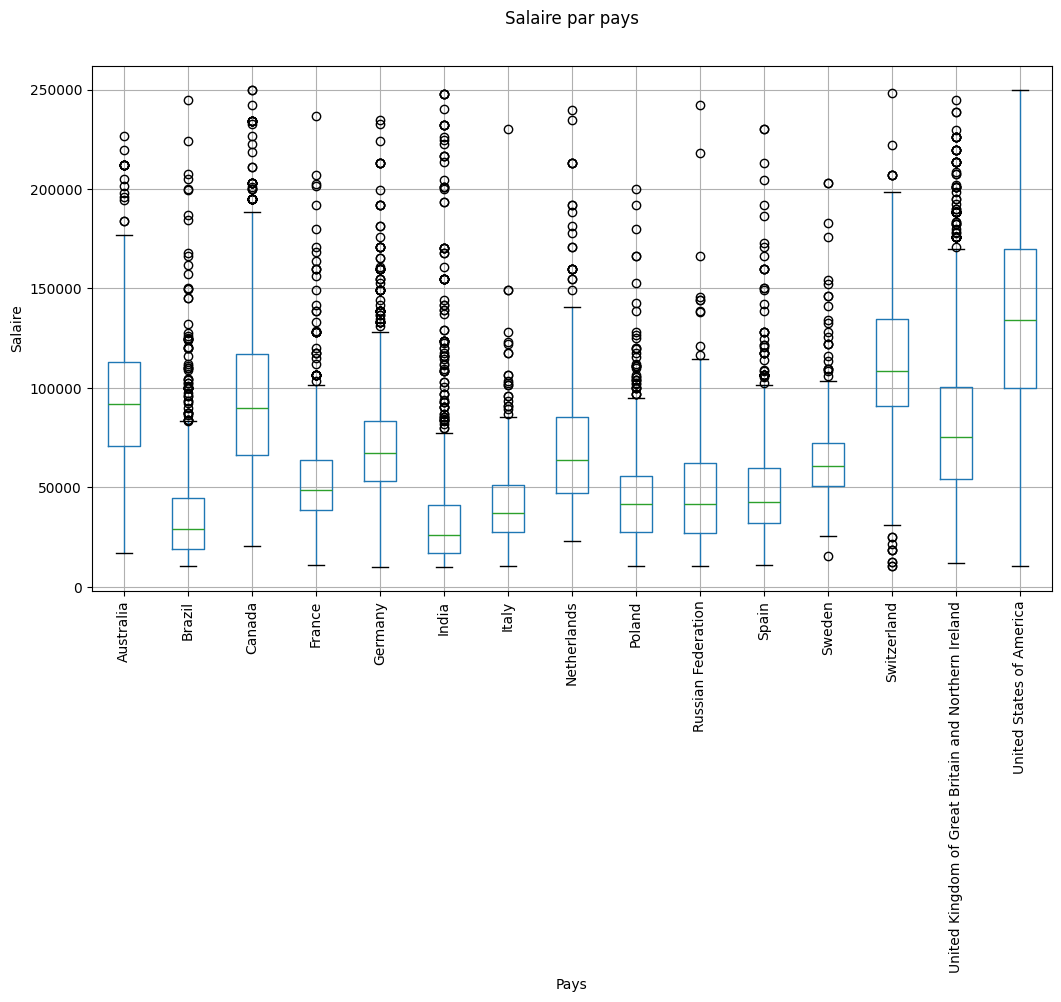

In [197]:
fig, ax =plt.subplots(1,1, figsize=(12,7))
df.boxplot("Salaire", "Pays", ax=ax)
plt.suptitle("Salaire par pays")
plt.title("")
plt.ylabel("Salaire")
plt.xticks(rotation=90)
plt.show()

In [198]:
df["Année(s) d'expérience"].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [199]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
    

In [200]:
df["Année(s) d'expérience"]=df["Année(s) d'expérience"].apply(clean_experience)

In [201]:
df["Niveau d'étude"].unique().tolist()

['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'Something else',
 'Associate degree (A.A., A.S., etc.)',
 'Some college/university study without earning a degree',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Professional degree (JD, MD, etc.)',
 'Other doctoral degree (Ph.D., Ed.D., etc.)',
 'Primary/elementary school']

In [202]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return "Bachelor / Licence"
    if "Master’s degree" in x:
        return "Master"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post Master"
    return "Inférieur au Bachelor"

df["Niveau d'étude"]=df["Niveau d'étude"].apply(clean_education)

In [205]:
df["Niveau d'étude"].unique().tolist()

['Master', 'Bachelor / Licence', 'Inférieur au Bachelor', 'Post Master']

In [179]:
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()
df["Niveau d'étude"]=le_education.fit_transform(df["Niveau d'étude"])

In [180]:
le_country=LabelEncoder()
df["Pays"]=le_country.fit_transform(df["Pays"])

In [132]:
# Diviser en train & test data
x=df.drop("Salaire", axis=1)
y=df.Salaire

In [133]:
# Choix de pas diviser en train, validation & Data mais c'est ce qui se fait normalement
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [134]:
y_pred=linear_reg.predict(x)

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
error= np.sqrt(mean_squared_error(y, y_pred))

In [136]:
error

44689.67485721425

In [137]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor()
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor()

In [138]:
y_pred=dec_tree_reg.predict(x)

In [139]:
error= np.sqrt(mean_squared_error(y, y_pred))

In [140]:
print(f"erreur: {round(error,3)}")

erreur: 33529.799


In [141]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor()
random_forest_reg.fit(x,y.values)

RandomForestRegressor()

In [142]:
y_pred=random_forest_reg.predict(x)

In [143]:
error= np.sqrt(mean_squared_error(y, y_pred))

In [144]:
print(f"erreur: {round(error,3)}")

erreur: 33616.066


In [145]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters={"max_depth":max_depth}

regressor=DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values) 


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [146]:
regressor=gs.best_estimator_
regressor.fit(x,y.values)
y_pred=regressor.predict(x)
error=np.sqrt(mean_squared_error(y,y_pred))
print("erreur: \n{:,.02f}".format(error))

erreur: 
34,864.27


In [147]:
x

,Pays,Niveau d'étude,Année(s) d'expérience
2,13,2,5.0
8,7,2,6.0
10,13,0,2.0
12,14,0,5.0
21,6,2,4.0
...,...,...,...
73113,14,2,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [148]:
X=np.array([["France", "Master", 10]])
X

array([['France', 'Master', '10']], dtype='<U21')

In [149]:
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_education.transform(X[:,1])
X=X.astype(float)
X

array([[ 3.,  2., 10.]])

In [150]:
y_pred=regressor.predict(X)
y_pred

/Users/mac/Documents/ml_projects/MLprojects/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([65633.92697769])

In [151]:
import pickle

In [152]:
data={"model":regressor, "le_country":le_country, "le_education":le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [153]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded=data["model"]
le_country=data["le_country"]
le_education=data["le_education"]

In [154]:
y_pred=regressor_loaded.predict(X)
y_pred

/Users/mac/Documents/ml_projects/MLprojects/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([65633.92697769])

In [155]:
df

,Pays,Niveau d'étude,Année(s) d'expérience,Salaire
2,13,2,5.0,40205.0
8,7,2,6.0,49056.0
10,13,0,2.0,60307.0
12,14,0,5.0,65000.0
21,6,2,4.0,34126.0
...,...,...,...,...
73113,14,2,5.0,94000.0
73116,14,0,16.0,115000.0
73119,14,0,1.0,70000.0
73120,10,0,2.0,35192.0
